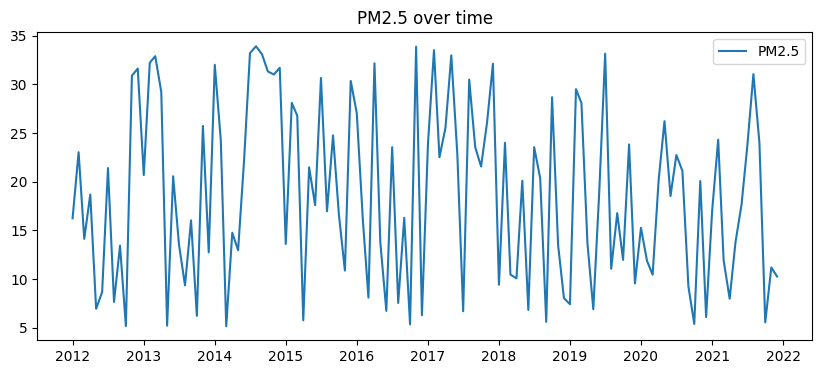

ADF Statistic: -9.886813891901397
p-value: 3.6455466907399357e-17
                               SARIMAX Results                                
Dep. Variable:          PM2.5 (µg/m³)   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -432.639
Date:                Sat, 12 Apr 2025   AIC                            871.278
Time:                        04:33:41   BIC                            879.615
Sample:                    01-01-2012   HQIC                           874.663
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0723      0.097      0.742      0.458      -0.119       0.263
ma.L1         -0.9665      0.042    -22.821      0.000      -1.05

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


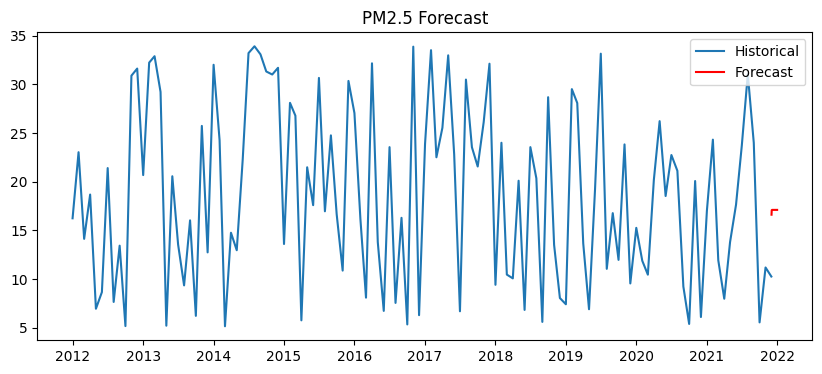

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

register_matplotlib_converters()

# Step 1: Load the dataset
df = pd.read_csv('/content/us_air_pollution_2012_2021_updated.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Step 2: Handle encoding issues
df.columns = [col.encode('utf-8').decode('utf-8').replace("Â", "") for col in df.columns]
df = df.apply(pd.to_numeric, errors='coerce')  # convert all to numeric, force errors to NaN

# Step 3: Drop missing values
df = df.dropna()

# Step 4: Visualize the PM2.5 levels
plt.figure(figsize=(10, 4))
plt.plot(df['PM2.5 (µg/m³)'], label='PM2.5')
plt.title('PM2.5 over time')
plt.legend()
plt.show()

# Step 5: Check stationarity using ADF test
result = adfuller(df['PM2.5 (µg/m³)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 6: Differencing (if p-value > 0.05)
df['PM2.5_diff'] = df['PM2.5 (µg/m³)'].diff().dropna()

# Step 7: Fit ARIMA model (you can tune p,d,q manually or use auto_arima)
model = ARIMA(df['PM2.5 (µg/m³)'], order=(1,1,1))  # Example (p=1, d=1, q=1)
model_fit = model.fit()

# Step 8: Summary
print(model_fit.summary())

# Step 9: Forecast
forecast = model_fit.forecast(steps=30)  # Forecasting next 30 time points

# Step 10: Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df['PM2.5 (µg/m³)'], label='Historical')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('PM2.5 Forecast')
plt.show()